In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from scikeras.wrappers import KerasRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
def naive_roc_auc_score(y_true, y_pred):
  
  y_true = y_true.to_numpy()
  
  num_same_sign = 0
  num_pairs = 0
  
  for a in range(len(y_true)):
    for b in range(len(y_true)):
      if y_true[a] > y_true[b]:
        num_pairs += 1
        if y_pred[a] > y_pred[b]:
          num_same_sign += 1
        elif y_pred[a] == y_pred[b]:
          num_same_sign += .5
        
  return num_same_sign / num_pairs

# score = make_scorer(naive_roc_auc_score, greater_is_better=True)

In [3]:
def create_model():
 # create model
 model = Sequential()
 model.add(Dense(29, input_shape=(29,), activation='elu'))
 model.add(BatchNormalization())
 model.add(Dense(30, activation='elu'))
 model.add(BatchNormalization())
 model.add(Dropout(rate=0.3))
 model.add(Dense(20, activation='elu'))
 model.add(BatchNormalization())
 model.add(Dropout(rate=0.3))
 model.add(BatchNormalization())
 model.add(Dense(20, activation='elu'))
 model.add(BatchNormalization())
 model.add(Dense(10, activation='elu'))
 model.add(BatchNormalization())
 model.add(Dense(1))
 # Compile model
 opt = optimizers.Adam(learning_rate=0.005)
 model.compile(loss='MeanSquaredError', optimizer=opt, metrics=['accuracy'])
 return model

In [4]:
data = pd.read_csv('Full_Descriptors.csv')

# get data
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data.dropna()
y = data['LUMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count', 'NO Count',
         'H Acceptors', 'H Donors', 'Ring Count', 'Aliphatic Rings', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Aromatic Heterocycles', 'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
scaler = StandardScaler().fit(X_train[list_numerical])
X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])

In [5]:
seed = 7
tf.random.set_seed(seed)
# load dataset
# create model
model = KerasRegressor(model=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv)
grid_cv = grid.fit(X_train, y_train)
# summarize results
print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", naive_roc_auc_score(y_train, grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ",naive_roc_auc_score(y_test, grid_cv.predict(X_test)))
print('Train Mean Absolute Error:', abs(grid_cv.predict(X_train) - y_train), 'degrees.')
print('Test Mean Absolute Error:', abs(grid_cv.predict(X_test) - y_test), 'degrees.')

# prediction = model.predict(X_test)
# mse = mean_squared_error(y_test, prediction)
# #calculate R-squared of regression model
# r_squared = model.score(X_test, y_test)

#view R-squared value
print("Train R2: ", r2_score(y_train, grid_cv.predict(X_train)))
print("Test R2: ", r2_score(y_test, grid_cv.predict(X_test)))
# rmse = mse**.5
print("Train MSE: ", mean_squared_error(y_train, grid_cv.predict(X_train)))
print("Test MSE: ", mean_squared_error(y_test, grid_cv.predict(X_test)))

Param for GS {'batch_size': 20, 'epochs': 100}
CV score for GS -0.5285231873007017
Train AUC ROC Score for GS:  0.7039308467049089
Test AUC ROC Score for GS:  0.614065180102916
Train Mean Absolute Error: 187    0.027024
140    0.001784
289    0.002106
315    0.028838
294    0.025336
         ...   
124    0.053193
321    0.024188
16     0.017178
126    0.004862
266    0.001942
Name: LUMO, Length: 279, dtype: float64 degrees.
Test Mean Absolute Error: 173    0.023954
112    0.033072
98     0.005716
190    0.024986
57     0.002053
         ...   
195    0.003589
79     0.010888
101    0.010856
209    0.016091
127    0.023547
Name: LUMO, Length: 70, dtype: float64 degrees.
Train R2:  -0.4284405125660258
Test R2:  -2.6482982929813295
Train MSE:  0.00031845049891698576
Test MSE:  0.00035488263231971855


In [6]:
def create_new_model():
 # create model
 model = Sequential()
 model.add(Dense(29, input_shape=(29,), activation='elu'))
#  model.add(BatchNormalization())
 model.add(Dense(40, activation='elu'))
#  model.add(BatchNormalization())
 model.add(Dense(40, activation='elu'))
#  model.add(BatchNormalization())
#  model.add(BatchNormalization())
 model.add(Dense(30, activation='elu'))
#  model.add(BatchNormalization())
 model.add(Dense(30, activation='elu'))
#  model.add(BatchNormalization())
 model.add(Dense(30, activation='elu'))
#  model.add(BatchNormalization())
 model.add(Dense(30, activation='elu'))
#  model.add(BatchNormalization())
 model.add(Dense(20, activation='elu'))
#  model.add(BatchNormalization())
 model.add(Dense(1))
#  model.add(BatchNormalization())
 # Compile model
 opt = optimizers.Adam(learning_rate=0.002)
 model.compile(loss='MeanSquaredError', optimizer=opt, metrics=['accuracy'])
 return model

In [7]:
seed = 7
tf.random.set_seed(seed)
# load dataset
# create model
model = KerasRegressor(model=create_new_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv)
grid_cv = grid.fit(X_train, y_train)
# summarize results
print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", naive_roc_auc_score(y_train, grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ",naive_roc_auc_score(y_test, grid_cv.predict(X_test)))
print('Train Mean Absolute Error:', abs(grid_cv.predict(X_train) - y_train), 'degrees.')
print('Test Mean Absolute Error:', abs(grid_cv.predict(X_test) - y_test), 'degrees.')

# prediction = model.predict(X_test)
# mse = mean_squared_error(y_test, prediction)
# #calculate R-squared of regression model
# r_squared = model.score(X_test, y_test)

#view R-squared value
print("Train R2: ", r2_score(y_train, grid_cv.predict(X_train)))
print("Test R2: ", r2_score(y_test, grid_cv.predict(X_test)))
# rmse = mse**.5
print("Train MSE: ", mean_squared_error(y_train, grid_cv.predict(X_train)))
print("Test MSE: ", mean_squared_error(y_test, grid_cv.predict(X_test)))

Param for GS {'batch_size': 10, 'epochs': 100}
CV score for GS 0.3738458962679757
Train AUC ROC Score for GS:  0.8513309894525364
Test AUC ROC Score for GS:  0.7165523156089194
Train Mean Absolute Error: 187    0.000388
140    0.000849
289    0.003269
315    0.004900
294    0.004308
         ...   
124    0.007936
321    0.006707
16     0.004976
126    0.002583
266    0.003159
Name: LUMO, Length: 279, dtype: float64 degrees.
Test Mean Absolute Error: 173    0.007952
112    0.006242
98     0.008642
190    0.000508
57     0.002260
         ...   
195    0.004556
79     0.000718
101    0.013870
209    0.022799
127    0.008423
Name: LUMO, Length: 70, dtype: float64 degrees.
Train R2:  0.8387088752106734
Test R2:  -1.2506185268825236
Train MSE:  3.5957562606352315e-05
Test MSE:  0.00021892547237822166


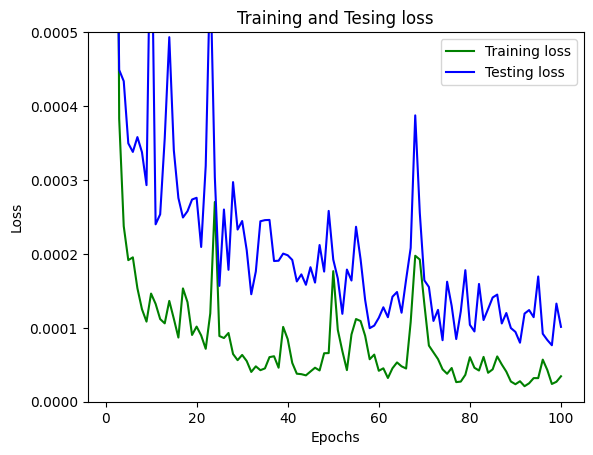

In [11]:
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))
loss_train = model.history_['loss']
loss_val = model.history_['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Testing loss')
# plt.xlim(30, 100)
plt.ylim(.0000, .0005)
plt.title('Training and Tesing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()